In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # For pairplots and heatmaps
from datetime import datetime
import json
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import glob
import ast, math

### Data loading and preprocessing

In [2]:
data_path = "/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/"
merged_df = []
for file_name in glob.glob(data_path+'*.csv'):
    print(file_name)
    df = pd.read_csv(file_name)
    merged_df.append(df)
    # print(df.columns)
    # df = pd.concat([df, pd.read_csv(file_name)],axis=0, ignore_index=True, sort=False)
df_data = pd.concat(merged_df)

/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P31.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/Discovery_World_Day2.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P30.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/Discovery_World_Day1.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P29.csv


#### Utility functions

In [5]:
from datetime import date
from datetime import datetime


'''
Calculate time difference in seconds between two time
Input: t1, t2
Return: time difference in seconds
'''
def time_diff(t1, t2):
    # print(type(x), type(y))
    # a = datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
    # b = datetime.strptime(y, '%Y-%m-%d %H:%M:%S.%f')
    return (t2 - t1).total_seconds() # in seconds
'''
Calculate age in the year fromate from DoB (if DoB present in the age column)
Input: born (in %Y-%m-%d format)
Return: Age (in Year)
'''
def calculate_age(born):
    if(not isinstance(born, str)):
        return int(born)
    born = datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))



In [6]:
df_round = df_data[df_data['game_type'] == "Round_Around"] ## ## Select Round Around game data
df_round["age"] = df_round.apply(lambda x: calculate_age(x.age), axis=1)
df_round

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_90186/2180895770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_round["age"] = df_round.apply(lambda x: calculate_age(x.age), axis=1)


,user_id,name,age,location,used_hand,study_id,study_day,try_allowed,try_number,try_remaining,study_start,study_end,game_type,star_time,end_time,total_time,data
14,BV4KUO,P31,8,Lab,Right,19,Day-1,50,18,32,2023-06-19 19:04:05.183477+00:00,2023-06-19 19:23:11.666561+00:00,Round_Around,2023-06-19 14:18:51+00:00,2023-06-19 14:20:52+00:00,121,"[""righttap_time"": [""2023-06-19 14:18:51.8120"",..."
16,BV4KUO,P31,8,Lab,Right,19,Day-1,50,18,32,2023-06-19 19:04:05.183477+00:00,2023-06-19 19:23:11.666561+00:00,Round_Around,2023-06-19 14:19:43+00:00,2023-06-19 14:21:44+00:00,121,"[""right_circle"": [""center_x"": 756.0, ""radius"":..."
17,BV4KUO,P31,8,Lab,Right,19,Day-1,50,18,32,2023-06-19 19:04:05.183477+00:00,2023-06-19 19:23:11.666561+00:00,Round_Around,2023-06-19 14:21:10+00:00,2023-06-19 14:23:11+00:00,121,"[""right_circle"": [""radius"": 157.5, ""center_x"":..."
1,6BTOLJ,P16,10,Indoor,Right,36,Day-1,100,29,71,2023-11-16 15:14:25.662251+00:00,2023-11-16 17:51:17.197257+00:00,Round_Around,2023-11-16 09:48:13+00:00,2023-11-16 09:50:14+00:00,121,"[""lefttap_time_anti_anti"": [""2023-11-16 09:48:..."
6,6BTOLJ,P20,9,Indoor,Right,36,Day-1,100,29,71,2023-11-16 15:14:25.662251+00:00,2023-11-16 17:51:17.197257+00:00,Round_Around,2023-11-16 10:16:17+00:00,2023-11-16 10:18:18+00:00,121,"[""righttap_time_anti_clock"": [], ""left_circle""..."
14,ZURFW1,P30,12,Lab,Right,21,Day-1,50,18,32,2023-06-20 19:58:54.194268+00:00,2023-06-20 20:19:30.368469+00:00,Round_Around,2023-06-20 15:13:40+00:00,2023-06-20 15:15:41+00:00,121,"[""left_circle"": [""center_y"": 405.0, ""center_x""..."
17,17W8X3,P8,10,Indoor,Right,35,Day-1,100,41,59,2023-11-16 15:13:57.830133+00:00,2023-11-16 17:49:38.651387+00:00,Round_Around,2023-11-16 10:26:32+00:00,2023-11-16 10:28:33+00:00,121,"[""righttap_angle_clock_clock"": [267, 268, 268,..."
26,17W8X3,P10,11,Indoor,Right,35,Day-1,100,41,59,2023-11-16 15:13:57.830133+00:00,2023-11-16 17:49:38.651387+00:00,Round_Around,2023-11-16 10:41:31+00:00,2023-11-16 10:43:31+00:00,120,"[""lefttap_time_anti_anti"": [""2023-11-16 10:42:..."
6,CWALSL,P29,5,Lab,Right,20,Day-1,20,9,11,2023-06-19 19:27:21.747335+00:00,2023-06-19 19:42:48.333426+00:00,Round_Around,2023-06-19 14:34:49+00:00,2023-06-19 14:36:50+00:00,121,"[""lefttap_angle"": [272, 272, 271, 271, 271, 27..."


#### Preprocessing

In [4]:
list_of_dict = []
for index, row in df_round.iterrows():
    data = row["data"]
    # print(data)
    data_l = data[:-2].split("],")
    data_dict = {}
    for d in data_l:
        c = d.count(':')
        if(c==4):
            d = d.replace("[", "{")
            d = "{" + d[1:] + "}}"
        else:
            d = "{" + d[1:] + "]}"
        data_dict.update(eval(d))
    list_of_dict.append(data_dict)
print("Number of Trails:" + str(len(list_of_dict)))

Number of Trails:9


#### Utility functions

In [7]:
import math
angle_prev = 0
def calculate_phase_diff(right_df, left_df):
    # print(right_df, left_df)
    right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
    left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
    
    df = pd.merge_asof(right_df, left_df, on='Timestamp')
    # for index, row in df.iterrows():
    #     print(row["righttap_angle_sin"], row["lefttap_angle_sin"], math.asin(row["righttap_angle_sin"])*( 180.0 / math.pi ), math.asin(row["lefttap_angle_sin"])*( 180.0 / math.pi ))
    df["phase_diff"] = df.apply(lambda x: math.asin(x.righttap_angle_sin)*( 180.0 / math.pi )- math.asin(x.lefttap_angle_sin)*( 180.0 / math.pi ), axis=1)
    # print(df)
    return df[["Timestamp", "phase_diff", "righttap_angle_sin", "lefttap_angle_sin"]]

def calculate_speed_diff(right_df, left_df):
    # print(right_df, left_df)
    right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
    left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
    
    df = pd.merge_asof(right_df, left_df, on='Timestamp')
    df["speed_diff"] = df.apply(lambda x: x.righttap_speed- x.lefttap_speed, axis=1)
    # print(df)
    return df[["Timestamp", "speed_diff"]]

### Signle trial data analysis

In [7]:
marker = ["_clock_clock", "_anti_anti", "_anti_clock", "_clock_anti"]
data_dict = list_of_dict[2]
# print(data_dict)
right = []
left = []
phase = []
speed = []
for m in marker:
    df_right = pd.DataFrame(data_dict["righttap_time" + m], columns=['righttap_time'])
    df_right["righttap_angle"] = data_dict["righttap_angle" + m]
    df_right["righttap_time"] = df_right.apply(lambda x: datetime.strptime(x.righttap_time, '%Y-%m-%d %H:%M:%S.%f'), axis=1)
    df_right["righttap_angle_sin"] = df_right.apply(lambda x: math.sin(math.radians(x.righttap_angle)), axis=1)
    ## Calculate Angluar Velocity
    diff_right = df_right.diff()
    diff_right = diff_right[diff_right['righttap_angle'].notna()]
    diff_right["righttap_time"] = diff_right["righttap_time"].dt.total_seconds()*1000 
    df_right["righttap_speed"] = diff_right.apply(lambda x: x.righttap_angle/x.righttap_time, axis=1)
    
    df_left = pd.DataFrame(data_dict["lefttap_time" + m], columns=['lefttap_time'])
    df_left["lefttap_angle"] = data_dict["lefttap_angle" + m]
    df_left["lefttap_time"] = df_left.apply(lambda x: datetime.strptime(x.lefttap_time, '%Y-%m-%d %H:%M:%S.%f'), axis=1)
    df_left["lefttap_angle_sin"] = df_left.apply(lambda x: math.sin(math.radians(x.lefttap_angle)), axis=1)
    diff_left = df_left.diff()
    diff_left = diff_left[diff_left['lefttap_angle'].notna()]
    diff_left["lefttap_time"] = diff_left["lefttap_time"].dt.total_seconds()*1000 
    df_left["lefttap_speed"] = diff_left.apply(lambda x: x.lefttap_angle/x.lefttap_time, axis=1)
    ## Calculate time difference in seconds
    start_time_r = df_right.iloc[0]["righttap_time"]
    start_time_l = df_left.iloc[0]["lefttap_time"]
    start_time = start_time_r if start_time_r<start_time_l else start_time_l
    print(start_time_r, start_time_l, start_time)
    df_right["time_diff"] = df_right.apply(lambda x: time_diff(start_time, x.righttap_time), axis=1)
    df_left["time_diff"] = df_left.apply(lambda x: time_diff(start_time, x.lefttap_time), axis=1)
    ## Calculate Phase difference in Angle
    phase_df = calculate_phase_diff(df_right[["righttap_time", "righttap_angle", "righttap_angle_sin"]], df_left[["lefttap_time", "lefttap_angle", "lefttap_angle_sin"]])
    phase_df["time_diff"] = phase_df.apply(lambda x: time_diff(start_time, x.Timestamp), axis=1)
    ## Calculate Angular velocity difference
    speed_df = calculate_speed_diff(df_right[["righttap_time", "righttap_speed"]], df_left[["lefttap_time", "lefttap_speed"]])
    speed_df["time_diff"] = speed_df.apply(lambda x: time_diff(start_time, x.Timestamp), axis=1)
    right.append(df_right)
    left.append(df_left)
    phase.append(phase_df)
    speed.append(speed_df)
# print(right)
# print(left)

2023-11-16 09:48:14.468000 2023-11-16 09:48:14.427000 2023-11-16 09:48:14.427000


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/3921875431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/3921875431.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/3921875431.py:17: SettingWithCopyWarning: 
A value is trying t

               righttap_time  righttap_angle  righttap_angle_sin  \
0    2023-11-16 09:48:14.468             268           -0.999391   
1    2023-11-16 09:48:14.475             269           -0.999848   
2    2023-11-16 09:48:14.483             269           -0.999848   
3    2023-11-16 09:48:14.491             269           -0.999848   
4    2023-11-16 09:48:14.499             269           -0.999848   
...                      ...             ...                 ...   
2947 2023-11-16 09:48:42.522             131            0.754710   
2948 2023-11-16 09:48:42.531             124            0.829038   
2949 2023-11-16 09:48:42.539             117            0.891007   
2950 2023-11-16 09:48:42.549             109            0.945519   
2951 2023-11-16 09:48:42.556             103            0.974370   

                   Timestamp            lefttap_time  lefttap_angle  \
0    2023-11-16 09:48:14.468 2023-11-16 09:48:14.465            255   
1    2023-11-16 09:48:14.475 2023-11-16 0

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/3921875431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/3921875431.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/3921875431.py:17: SettingWithCopyWarning: 
A value is trying t

2023-11-16 09:49:17.544000 2023-11-16 09:49:17.617000 2023-11-16 09:49:17.544000
               righttap_time  righttap_angle  righttap_angle_sin  \
0    2023-11-16 09:49:17.544              94            0.997564   
1    2023-11-16 09:49:17.551              94            0.997564   
2    2023-11-16 09:49:17.560              93            0.998630   
3    2023-11-16 09:49:17.567              93            0.998630   
4    2023-11-16 09:49:17.575              93            0.998630   
...                      ...             ...                 ...   
2033 2023-11-16 09:49:42.515             344           -0.275637   
2034 2023-11-16 09:49:42.523             343           -0.292372   
2035 2023-11-16 09:49:42.531             342           -0.309017   
2036 2023-11-16 09:49:42.541             340           -0.342020   
2037 2023-11-16 09:49:42.548             339           -0.358368   

                   Timestamp            lefttap_time  lefttap_angle  \
0    2023-11-16 09:49:17.544   

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/3921875431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/3921875431.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/3921875431.py:17: SettingWithCopyWarning: 
A value is trying t

2023-11-16 09:49:48.696000 2023-11-16 09:49:48.537000 2023-11-16 09:49:48.537000
               righttap_time  righttap_angle  righttap_angle_sin  \
0    2023-11-16 09:49:48.696              85            0.996195   
1    2023-11-16 09:49:48.701              85            0.996195   
2    2023-11-16 09:49:48.735              85            0.996195   
3    2023-11-16 09:49:48.761              85            0.996195   
4    2023-11-16 09:49:48.786              86            0.997564   
...                      ...             ...                 ...   
1444 2023-11-16 09:50:01.842              84            0.994522   
1445 2023-11-16 09:50:01.851              77            0.974370   
1446 2023-11-16 09:50:01.859              70            0.939693   
1447 2023-11-16 09:50:01.867              62            0.882948   
1448 2023-11-16 09:50:01.877              56            0.829038   

                   Timestamp            lefttap_time  lefttap_angle  \
0    2023-11-16 09:49:48.696 20

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/3921875431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/3921875431.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/3921875431.py:17: SettingWithCopyWarning: 
A value is trying t

#### Visualize y1 and y2 signal of Right and Left hand, respectively.
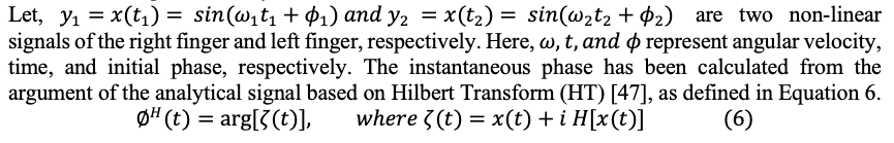

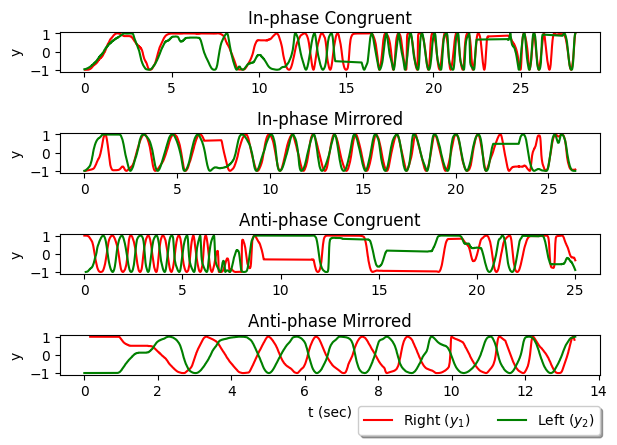

In [63]:
title = ["In-phase Congruent",
         "In-phase Mirrored",
         "Anti-phase Congruent", 
         "Anti-phase Mirrored"]

plt.rcParams.update({'font.size': 10})
for i in range(0, len(right)):
    plt.subplot(len(right), 1, i+1)
    # if(i==0):
        
    # dates = matplotlib.dates.date2num(df_right["righttap_time"])
    # plt.plot_date(dates, df_right["righttap_angle_sin"])
    # plot
    plt.plot(right[i]["time_diff"], right[i]["righttap_angle_sin"], color='r')
    plt.plot(left[i]["time_diff"], left[i]["lefttap_angle_sin"], color='g')
    # beautify the x-labels
    plt.title(title[i])
    
    plt.ylabel("y")
    # plt.gcf().autofmt_xdate()
plt.xlabel("t (sec)")
# plt.suptitle('Title of the figure')
# plt.legend("Right Hand", loc='upper left', color='r', bbox_to_anchor=(.8, -0.4),
#           fancybox=True, shadow=True, ncol=3)
# plt.legend("Left Hand", loc='upper left', color='g', bbox_to_anchor=(.8, -0.5),
#           fancybox=True, shadow=True, ncol=3)
plt.legend(["Right ($y_1$)", "Left ($y_2$)"], loc='upper left', bbox_to_anchor=(0.54, -0.6),
          fancybox=True, shadow=True, ncol=10)
plt.tight_layout()

# plt.set_size_inches(18.5, 10.5)
# plt.title("Phase Difference")
plt.show()

### Phase Syncronization
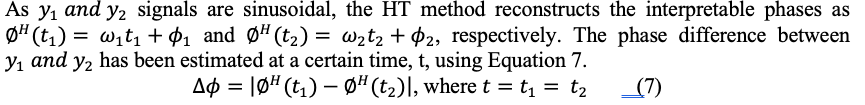

count    2952.000000
mean       18.443089
std        54.121719
min      -159.000000
25%        -8.000000
50%        13.000000
75%        38.000000
max       175.000000
Name: phase_diff, dtype: float64
count    3032.000000
mean      -10.657652
std        41.658415
min      -161.000000
25%       -22.000000
50%        -6.000000
75%        12.000000
max       135.000000
Name: phase_diff, dtype: float64
count    2029.000000
mean       -1.943815
std        88.909373
min      -178.000000
25%       -73.000000
50%        -7.000000
75%        65.000000
max       177.000000
Name: phase_diff, dtype: float64
count    1449.000000
mean      -11.056591
std        94.585039
min      -179.000000
25%       -93.000000
50%       -17.000000
75%        68.000000
max       175.000000
Name: phase_diff, dtype: float64


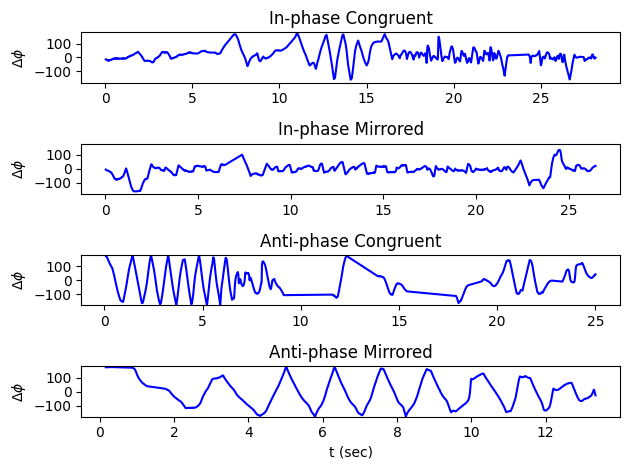

In [66]:
title = ["In-phase Congruent",
         "In-phase Mirrored",
         "Anti-phase Congruent", 
         "Anti-phase Mirrored"]

plt.rcParams.update({'font.size': 10})

for i in range(0, len(phase)):
    plt.subplot(len(phase), 1, i+1)
    # dates = matplotlib.dates.date2num(df_right["righttap_time"])
    # plt.plot_date(dates, df_right["righttap_angle_sin"])
    # plot
    plt.plot(phase[i]["time_diff"], phase[i]["phase_diff"], color='b')
    print(phase[i]["phase_diff"].describe())
    # plt.plot(left[i]["time_diff"], left[i]["lefttap_speed"])
    # beautify the x-labels
    plt.title(title[i])
    plt.ylabel(r'$\Delta\phi$')
    # plt.gcf().autofmt_xdate()
    plt.ylim(-180,180)
plt.xlabel("t (sec)")
# plt.suptitle('Title of the figure')
# plt.legend(["right_hand", "left_hand"], loc='upper center', bbox_to_anchor=(.8, -0.33),
#           fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
# plt.set_size_inches(18.5, 10.5)
plt.show()

### Speed Syncronization
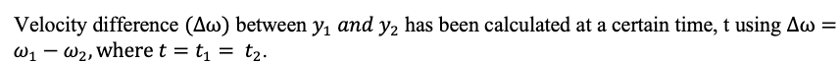

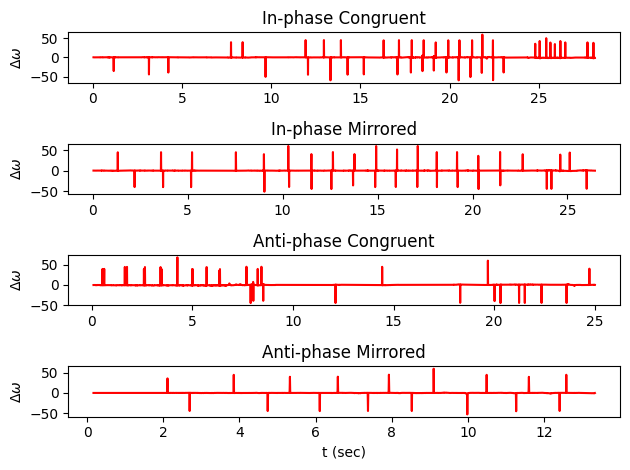

In [64]:
title = ["In-phase Congruent",
         "In-phase Mirrored",
         "Anti-phase Congruent", 
         "Anti-phase Mirrored"]
plt.rcParams.update({'font.size': 10})
for i in range(0, len(speed)):
    plt.subplot(len(speed), 1, i+1)
    # dates = matplotlib.dates.date2num(df_right["righttap_time"])
    # plt.plot_date(dates, df_right["righttap_angle_sin"])
    # plot
    plt.plot(speed[i]["time_diff"], speed[i]["speed_diff"], color='r')
    # plt.plot(left[i]["time_diff"], left[i]["lefttap_speed"])
    # beautify the x-labels
    plt.title(title[i])
    plt.ylabel(r'$\Delta\omega$')
    # plt.gcf().autofmt_xdate()
plt.xlabel("t (sec)")
# plt.suptitle('Title of the figure')
# plt.legend(["right_hand", "left_hand"], loc='upper center', bbox_to_anchor=(.8, -0.33),
#           fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
# plt.set_size_inches(18.5, 10.5)
plt.show()

### Hilbert Transform to calculate the phase difference

### Hilbert Transform and Phase Shift

In [20]:
from scipy.signal import hilbert, chirp
duration = 1.0

fs = 400.0

samples = int(fs*duration)

t = np.arange(samples) / fs
signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )
signal

array([ 1.        ,  0.97295768,  0.84319119,  0.61685866,  0.31165687,
       -0.04395215, -0.41296169, -0.75341365, -1.02308934, -1.18482474,
       -1.21181324, -1.09216072, -0.8319516 , -0.45619014, -0.00720057,
        0.4596103 ,  0.88233759,  1.20081779,  1.3654765 ,  1.34549858,
        1.13496981,  0.75578765,  0.25651065, -0.29311808, -0.81154718,
       -1.21755327, -1.44338742, -1.4467994 , -1.21975789, -0.79202444,
       -0.22845951,  0.3800417 ,  0.93092382,  1.3274956 ,  1.49662849,
        1.40332339,  1.05912096,  0.52224498, -0.11119527, -0.72389097,
       -1.19916674, -1.44392832, -1.40812138, -1.09644886, -0.56939238,
        0.06735714,  0.6835126 ,  1.15098705,  1.37136758,  1.2980269 ,
        0.94764065,  0.39796245, -0.22831021, -0.79050215, -1.16193996,
       -1.25959787, -1.06422567, -0.62572152, -0.05188822,  0.51723521,
        0.94354044,  1.12516413,  1.02220911,  0.66701323,  0.15589971,
       -0.3758618 , -0.78960292, -0.9799924 , -0.90303487, -0.58

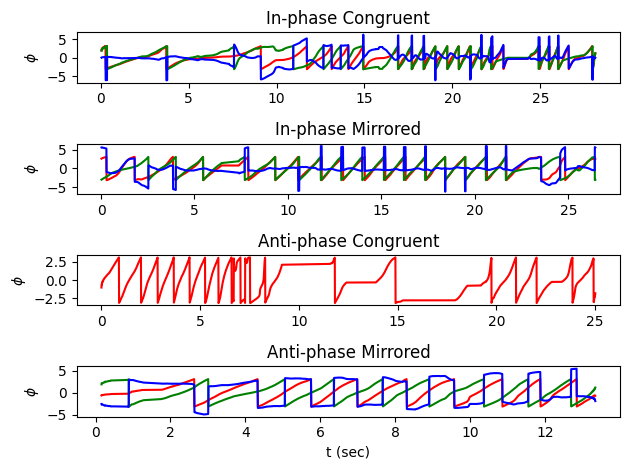

In [28]:
title = ["In-phase Congruent",
         "In-phase Mirrored",
         "Anti-phase Congruent", 
         "Anti-phase Mirrored"]
for i in range(0, len(phase)):
    plt.subplot(len(phase), 1, i+1)
    y1 = phase[i]["righttap_angle_sin"]
    y2 = phase[i]["lefttap_angle_sin"]
    ### Hilbert Transformed
    analytic_signal_y1 = hilbert(y1)
    amplitude_envelope_y1 = np.abs(analytic_signal_y1)
    instantaneous_phase_y1 = np.angle(analytic_signal_y1)
    # print(analytic_signal_y1)
    # plt.plot(phase[i]["time_diff"], y1, color='b')
    plt.plot(phase[i]["time_diff"], instantaneous_phase_y1, color='r')

    analytic_signal_y2 = hilbert(y2)
    amplitude_envelope_y2 = np.abs(analytic_signal_y2)
    instantaneous_phase_y2 = np.angle(analytic_signal_y2)
    # ps2 = np.rad2deg(np.angle(analytic_signal_y1./analytic_signal_y2))
    # print(ps2)
    plt.plot(phase[i]["time_diff"], instantaneous_phase_y2, color='g')
    plt.plot(phase[i]["time_diff"], instantaneous_phase_y1-instantaneous_phase_y2, color='b')
    # print(instantaneous_phase_y1[:10], instantaneous_phase_y2[:10])
    # plt.plot(left[i]["time_diff"], left[i]["lefttap_speed"])
    # beautify the x-labels
    plt.title(title[i])
    plt.ylabel(r'$\phi$')
    # plt.gcf().autofmt_xdate()
plt.xlabel("t (sec)")
# plt.suptitle('Title of the figure')
# plt.legend(["right_hand", "left_hand"], loc='upper center', bbox_to_anchor=(.8, -0.33),
#           fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
# plt.set_size_inches(18.5, 10.5)
plt.show()

### Standard Deviation in phase syncronization

In [196]:
age = df_round["age"].to_list()
age = age[2:-3]
age = [10.5, 9, 10, 11]

In [197]:
marker = ["_clock_clock", "_anti_anti", "_anti_clock", "_clock_anti"]
title = ["In-phase Congruent",
         "In-phase Mirrored",
         "Anti-phase Congruent", 
         "Anti-phase Mirrored"]
# age = df_round["age"].to_list()
# age = age[2:-3]
data_dict = list_of_dict[2]
phase = {}
phase_stat_1 = []
count = 0
for data_dict in list_of_dict[2:-3]:
    # print(data_dict.keys())
    # right = []
    # left = []
    # phase = []
    # speed = []
    i = 0
    for m in marker:
        if(data_dict["righttap_time" + m]):
            df_right = pd.DataFrame(data_dict["righttap_time" + m], columns=['righttap_time'])
            df_right["righttap_angle"] = data_dict["righttap_angle" + m]
            df_right["righttap_time"] = df_right.apply(lambda x: datetime.strptime(x.righttap_time, '%Y-%m-%d %H:%M:%S.%f'), axis=1)
            df_right["righttap_angle_sin"] = df_right.apply(lambda x: math.sin(math.radians(x.righttap_angle)), axis=1)
            ## Calculate Angluar Velocity
            diff_right = df_right.diff()
            diff_right = diff_right[diff_right['righttap_angle'].notna()]
            diff_right["righttap_time"] = diff_right["righttap_time"].dt.total_seconds()*1000 
            df_right["righttap_speed"] = diff_right.apply(lambda x: x.righttap_angle/x.righttap_time, axis=1)
            
            df_left = pd.DataFrame(data_dict["lefttap_time" + m], columns=['lefttap_time'])
            df_left["lefttap_angle"] = data_dict["lefttap_angle" + m]
            df_left["lefttap_time"] = df_left.apply(lambda x: datetime.strptime(x.lefttap_time, '%Y-%m-%d %H:%M:%S.%f'), axis=1)
            df_left["lefttap_angle_sin"] = df_left.apply(lambda x: math.sin(math.radians(x.lefttap_angle)), axis=1)
            diff_left = df_left.diff()
            diff_left = diff_left[diff_left['lefttap_angle'].notna()]
            diff_left["lefttap_time"] = diff_left["lefttap_time"].dt.total_seconds()*1000 
            df_left["lefttap_speed"] = diff_left.apply(lambda x: x.lefttap_angle/x.lefttap_time, axis=1)
            ## Calculate time difference in seconds
            start_time_r = df_right.iloc[0]["righttap_time"]
            start_time_l = df_left.iloc[0]["lefttap_time"]
            start_time = start_time_r if start_time_r<start_time_l else start_time_l
            # print(start_time_r, start_time_l, start_time)
            df_right["time_diff"] = df_right.apply(lambda x: time_diff(start_time, x.righttap_time), axis=1)
            df_left["time_diff"] = df_left.apply(lambda x: time_diff(start_time, x.lefttap_time), axis=1)
            ## Calculate Phase difference in Angle
            phase_df = calculate_phase_diff(df_right[["righttap_time", "righttap_angle", "righttap_angle_sin"]], df_left[["lefttap_time", "lefttap_angle", "lefttap_angle_sin"]])
            phase_df["time_diff"] = phase_df.apply(lambda x: time_diff(start_time, x.Timestamp), axis=1)
            ## Calculate Angular velocity difference
            speed_df = calculate_speed_diff(df_right[["righttap_time", "righttap_speed"]], df_left[["lefttap_time", "lefttap_speed"]])
            speed_df["time_diff"] = speed_df.apply(lambda x: time_diff(start_time, x.Timestamp), axis=1)
            # right.append(df_right)
            # left.append(df_left)
            # phase.append(phase_df)
            # speed.append(speed_df)
            print(title[i], phase_df["phase_diff"].describe()["std"], phase_df["phase_diff"].describe()["25%"])
            phase = phase_df["phase_diff"].describe()
            phase["age"] = age[count]
            phase["type"] = title[i] 
            phase_stat_1.append(phase)
        i += 1
    count += 1
print(phase_stat_1)
# print(left)

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

In-phase Congruent 54.12171868502208 -8.000000000000002


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

In-phase Mirrored 41.65841457151735 -22.000000000000036


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

Anti-phase Congruent 88.90937254346221 -73.0


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

Anti-phase Mirrored 94.58503934662848 -93.00000000000003


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

In-phase Congruent 54.62147560414771 -28.000000000000007


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

In-phase Mirrored 55.371021971088375 -45.00000000000003


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

In-phase Congruent 59.50563914614815 -45.0


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

In-phase Mirrored 41.760046892527235 -22.000000000000007


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

Anti-phase Congruent 89.79644012488029 -88.99999999999997


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

Anti-phase Mirrored 84.33046272967401 -73.50000000000003
In-phase Congruent 60.207239233065906 -6.999999999999979


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

In-phase Mirrored 50.96386111396077 -35.00000000000002


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

Anti-phase Congruent 86.84652747091042 -69.0
Anti-phase Mirrored 59.8673639077056 -23.00000000000002
[count                2952.0
mean              18.443089
std               54.121719
min                  -159.0
25%                    -8.0
50%                    13.0
75%                    38.0
max                   175.0
age                    10.5
type     In-phase Congruent
Name: phase_diff, dtype: object, count               3032.0
mean            -10.657652
std              41.658415
min                 -161.0
25%                  -22.0
50%                   -6.0
75%                   12.0
max                  135.0
age                   10.5
type     In-phase Mirrored
Name: phase_diff, dtype: object, count                  2029.0
mean                -1.943815
std                 88.909373
min                    -178.0
25%                     -73.0
50%                      -7.0
75%                      65.0
max                     177.0
age                      10.5
type     Ant

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

In [101]:
print(len(phase_stat_1))

14


In [58]:
from datetime import datetime, timedelta
start_time = datetime.strptime(list_of_dict[0]["righttap_time"][0], '%Y-%m-%d %H:%M:%S.%f')
print(len(list_of_dict[0]["righttap_time"]), start_time, start_time + timedelta(0,30))
print(len(list_of_dict[0]["lefttap_time"]), list_of_dict[0]["lefttap_time"][0], list_of_dict[0]["lefttap_time"][-1])

6014 2023-06-20 15:13:41.614000 2023-06-20 15:14:11.614000
5981 2023-06-20 15:13:41.7270 2023-06-20 15:15:41.4750


In [198]:
marker = ["_clock_clock", "_anti_anti", "_anti_clock", "_clock_anti"]
indexs = [0, -2]
# indexs = [1]
reconst_dict_list = []
for participant in indexs:
    dict = {}
    marker_idx = 0
    # print(list_of_dict[index])
    prev = list_of_dict[participant]["righttap_time"][0]
    prev_index = 0
    print("right", 0,prev, list_of_dict[participant]["righttap_angle"][0])
    for i in range(1, len(list_of_dict[participant]["righttap_time"])):
        temp = list_of_dict[participant]["righttap_time"][i]
        diff = (datetime.strptime(temp, '%Y-%m-%d %H:%M:%S.%f') - datetime.strptime(prev, '%Y-%m-%d %H:%M:%S.%f')).total_seconds()
        if(diff>2.0):
            print("right", i,list_of_dict[participant]["righttap_time"][i], list_of_dict[participant]["righttap_angle"][i],  diff)
            dict["righttap_time"+marker[marker_idx]] = list_of_dict[participant]["righttap_time"][prev_index:i-1]
            dict["righttap_angle"+marker[marker_idx]] = list_of_dict[participant]["righttap_angle"][prev_index:i-1]
            prev_index = i
            marker_idx+=1
        prev = temp
    dict["righttap_time"+marker[marker_idx]] = list_of_dict[participant]["righttap_time"][prev_index:]
    dict["righttap_angle"+marker[marker_idx]] = list_of_dict[participant]["righttap_angle"][prev_index:]
    
    marker_idx = 0
    prev = list_of_dict[participant]["lefttap_time"][0]
    prev_index = 0
    print("left", 0, prev, list_of_dict[participant]["lefttap_angle"][0])
    for i in range(1, len(list_of_dict[participant]["lefttap_time"])):
        temp = list_of_dict[participant]["lefttap_time"][i]
        diff = (datetime.strptime(temp, '%Y-%m-%d %H:%M:%S.%f') - datetime.strptime(prev, '%Y-%m-%d %H:%M:%S.%f')).total_seconds()
        if(diff>1.0):
            print("left", i,list_of_dict[participant]["lefttap_time"][i], list_of_dict[participant]["righttap_angle"][i],  diff)
            dict["lefttap_time"+marker[marker_idx]] = list_of_dict[participant]["lefttap_time"][prev_index:i-1]
            dict["lefttap_angle"+marker[marker_idx]] = list_of_dict[participant]["lefttap_angle"][prev_index:i-1]
            prev_index = i
            marker_idx+=1
        prev = temp
    dict["lefttap_time"+marker[marker_idx]] = list_of_dict[participant]["lefttap_time"][prev_index:]
    dict["lefttap_angle"+marker[marker_idx]] = list_of_dict[participant]["lefttap_angle"][prev_index:]
    reconst_dict_list.append(dict)
    print(dict.keys())

right 0 2023-06-20 15:13:41.6140 269
right 1677 2023-06-20 15:14:13.5540 268 4.092
right 3235 2023-06-20 15:14:48.4210 91 8.954
right 4476 2023-06-20 15:15:15.1650 92 5.708
left 0 2023-06-20 15:13:41.7270 274
left 1666 2023-06-20 15:14:13.6070 349 4.143
left 3220 2023-06-20 15:14:48.4580 334 8.988
left 4481 2023-06-20 15:15:15.2790 94 5.819
dict_keys(['righttap_time_clock_clock', 'righttap_angle_clock_clock', 'righttap_time_anti_anti', 'righttap_angle_anti_anti', 'righttap_time_anti_clock', 'righttap_angle_anti_clock', 'righttap_time_clock_anti', 'righttap_angle_clock_anti', 'lefttap_time_clock_clock', 'lefttap_angle_clock_clock', 'lefttap_time_anti_anti', 'lefttap_angle_anti_anti', 'lefttap_time_anti_clock', 'lefttap_angle_anti_clock', 'lefttap_time_clock_anti', 'lefttap_angle_clock_anti'])
right 0 2023-06-19 14:19:45.3180 271
right 1347 2023-06-19 14:20:11.0490 92 2.021
right 1466 2023-06-19 14:20:16.9320 267 4.009
right 2243 2023-06-19 14:20:31.8860 124 2.183
left 0 2023-06-19 14:19

In [164]:
indexs = [1]
for participant in indexs:
    dict = {}
    marker_idx = 0
    # print(list_of_dict[index])
    prev = list_of_dict[participant]["righttap_time"][0]
    start_time = list_of_dict[participant]["righttap_time"][0]
    prev_index = 0
    print("right", 0,prev, list_of_dict[participant]["righttap_angle"][0])
    for i in range(1, len(list_of_dict[participant]["righttap_time"])):
        temp = list_of_dict[participant]["righttap_time"][i]
        diff = (datetime.strptime(temp, '%Y-%m-%d %H:%M:%S.%f') - datetime.strptime(prev, '%Y-%m-%d %H:%M:%S.%f')).total_seconds()
        game_time = (datetime.strptime(temp, '%Y-%m-%d %H:%M:%S.%f') - datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S.%f')).total_seconds()
        if(diff>2.0 and game_time>20.0):
            print("right", i,list_of_dict[participant]["righttap_time"][i], list_of_dict[participant]["righttap_angle"][i],  diff)
            dict["righttap_time"+marker[marker_idx]] = list_of_dict[participant]["righttap_time"][prev_index:i-1]
            dict["righttap_angle"+marker[marker_idx]] = list_of_dict[participant]["righttap_angle"][prev_index:i-1]
            prev_index = i
            marker_idx+=1
        prev = temp
    dict["righttap_time"+marker[marker_idx]] = list_of_dict[participant]["righttap_time"][prev_index:]
    dict["righttap_angle"+marker[marker_idx]] = list_of_dict[participant]["righttap_angle"][prev_index:]
    
    marker_idx = 0
    prev = list_of_dict[participant]["lefttap_time"][0]
    prev_index = 0
    print("left", 0, prev, list_of_dict[participant]["lefttap_angle"][0])
    for i in range(1, len(list_of_dict[participant]["lefttap_time"])):
        temp = list_of_dict[participant]["lefttap_time"][i]
        diff = (datetime.strptime(temp, '%Y-%m-%d %H:%M:%S.%f') - datetime.strptime(prev, '%Y-%m-%d %H:%M:%S.%f')).total_seconds()
        if(diff>1.0):
            print("left", i,list_of_dict[participant]["lefttap_time"][i], list_of_dict[participant]["righttap_angle"][i],  diff)
            dict["lefttap_time"+marker[marker_idx]] = list_of_dict[participant]["lefttap_time"][prev_index:i-1]
            dict["lefttap_angle"+marker[marker_idx]] = list_of_dict[participant]["lefttap_angle"][prev_index:i-1]
            prev_index = i
            marker_idx+=1
        prev = temp
    dict["lefttap_time"+marker[marker_idx]] = list_of_dict[participant]["lefttap_time"][prev_index:]
    dict["lefttap_angle"+marker[marker_idx]] = list_of_dict[participant]["lefttap_angle"][prev_index:]
    # reconst_dict_list.append(dict)
    print(dict.keys())
dict["righttap_time_clock_anti"] = []
dict["righttap_angle_clock_anti"] = []
dict["lefttap_time_clock_anti"] = []
dict["lefttap_angle_clock_anti"] = []
reconst_dict_list.append(dict)

right 0 2023-06-19 14:35:00.8650 267
right 515 2023-06-19 14:35:23.1100 271 4.656
right 938 2023-06-19 14:35:54.0950 91 24.011
left 0 2023-06-19 14:34:54.0050 272
left 491 2023-06-19 14:35:23.3180 85 17.695
left 939 2023-06-19 14:35:54.1600 90 23.477
dict_keys(['righttap_time_clock_clock', 'righttap_angle_clock_clock', 'righttap_time_anti_anti', 'righttap_angle_anti_anti', 'righttap_time_anti_clock', 'righttap_angle_anti_clock', 'lefttap_time_clock_clock', 'lefttap_angle_clock_clock', 'lefttap_time_anti_anti', 'lefttap_angle_anti_anti', 'lefttap_time_anti_clock', 'lefttap_angle_anti_clock'])


In [92]:
age = df_round["age"].to_list()
age

[12, 5, 10, 9, 10, 11, 8, 8, 8]

In [199]:
marker = ["_clock_clock", "_anti_anti", "_anti_clock", "_clock_anti"]
title = ["In-phase Congruent",
         "In-phase Mirrored",
         "Anti-phase Congruent", 
         "Anti-phase Mirrored"]
age = [12, 8, 5]
phase = {}
phase_stat_2 = []
count = 0
for data_dict in reconst_dict_list:
    # print(data_dict.keys())
    # right = []
    # left = []
    # phase = []
    # speed = []
    i = 0
    for m in marker:
        if(data_dict["righttap_time" + m]):
            df_right = pd.DataFrame(data_dict["righttap_time" + m], columns=['righttap_time'])
            df_right["righttap_angle"] = data_dict["righttap_angle" + m]
            df_right["righttap_time"] = df_right.apply(lambda x: datetime.strptime(x.righttap_time, '%Y-%m-%d %H:%M:%S.%f'), axis=1)
            df_right["righttap_angle_sin"] = df_right.apply(lambda x: math.sin(math.radians(x.righttap_angle)), axis=1)
            ## Calculate Angluar Velocity
            diff_right = df_right.diff()
            diff_right = diff_right[diff_right['righttap_angle'].notna()]
            diff_right["righttap_time"] = diff_right["righttap_time"].dt.total_seconds()*1000 
            df_right["righttap_speed"] = diff_right.apply(lambda x: x.righttap_angle/x.righttap_time, axis=1)
            
            df_left = pd.DataFrame(data_dict["lefttap_time" + m], columns=['lefttap_time'])
            df_left["lefttap_angle"] = data_dict["lefttap_angle" + m]
            df_left["lefttap_time"] = df_left.apply(lambda x: datetime.strptime(x.lefttap_time, '%Y-%m-%d %H:%M:%S.%f'), axis=1)
            df_left["lefttap_angle_sin"] = df_left.apply(lambda x: math.sin(math.radians(x.lefttap_angle)), axis=1)
            diff_left = df_left.diff()
            diff_left = diff_left[diff_left['lefttap_angle'].notna()]
            diff_left["lefttap_time"] = diff_left["lefttap_time"].dt.total_seconds()*1000 
            df_left["lefttap_speed"] = diff_left.apply(lambda x: x.lefttap_angle/x.lefttap_time, axis=1)
            ## Calculate time difference in seconds
            start_time_r = df_right.iloc[0]["righttap_time"]
            start_time_l = df_left.iloc[0]["lefttap_time"]
            start_time = start_time_r if start_time_r<start_time_l else start_time_l
            # print(start_time_r, start_time_l, start_time)
            df_right["time_diff"] = df_right.apply(lambda x: time_diff(start_time, x.righttap_time), axis=1)
            df_left["time_diff"] = df_left.apply(lambda x: time_diff(start_time, x.lefttap_time), axis=1)
            ## Calculate Phase difference in Angle
            phase_df = calculate_phase_diff(df_right[["righttap_time", "righttap_angle", "righttap_angle_sin"]], df_left[["lefttap_time", "lefttap_angle", "lefttap_angle_sin"]])
            phase_df["time_diff"] = phase_df.apply(lambda x: time_diff(start_time, x.Timestamp), axis=1)
            ## Calculate Angular velocity difference
            speed_df = calculate_speed_diff(df_right[["righttap_time", "righttap_speed"]], df_left[["lefttap_time", "lefttap_speed"]])
            speed_df["time_diff"] = speed_df.apply(lambda x: time_diff(start_time, x.Timestamp), axis=1)
            # right.append(df_right)
            # left.append(df_left)
            # phase.append(phase_df)
            # speed.append(speed_df)
            print(title[i], phase_df["phase_diff"].describe()["std"], phase_df["phase_diff"].describe()["25%"])
            phase = phase_df["phase_diff"].describe()
            phase["age"] = age[count]
            phase["type"] = title[i] 
            phase_stat_2.append(phase)
            # print(phase_stat_2)
        i += 1
    count += 1
print(phase_stat_2)
# print(left)

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

In-phase Congruent 17.199229821313796 -17.000000000000014


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

In-phase Mirrored 21.248576742522225 -17.000000000000007


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

Anti-phase Congruent 76.39139819842835 -58.999999999999986


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

Anti-phase Mirrored 84.73543783696542 -59.000000000000036


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

In-phase Congruent 37.54336760366369 -14.999999999999984
In-phase Mirrored 28.349278320828027 -5.999999999999984
Anti-phase Congruent 37.87111103309853 -18.99999999999996
Anti-phase Mirrored 39.756234087104666 -26.00000000000002
[count                1667.0
mean              -5.424715
std                17.19923
min                   -54.0
25%                   -17.0
50%                    -6.0
75%                     6.0
max                    48.0
age                    12.0
type     In-phase Congruent
Name: phase_diff, dtype: object, count               1552.0
mean             -2.068943
std              21.248577
min                  -46.0
25%                  -17.0
50%                   -5.0
75%                   16.0
max                   44.0
age                   12.0
type     In-phase Mirrored
Name: phase_diff, dtype: object, count                  1237.0
mean                -4.396928
std                 76.391398
min                    -178.0
25%                     -59.0
50% 

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['Timestamp'] = pd.to_datetime(right_df['righttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['Timestamp'] = pd.to_datetime(left_df['lefttap_time'])
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/957436260.py:17: SettingWithCopyWarning: 
A value is trying to b

In [127]:
print(len(phase_stat_2))

11


In [200]:
phase_stat = phase_stat_1 + phase_stat_2
phase_stat

[count                2952.0
 mean              18.443089
 std               54.121719
 min                  -159.0
 25%                    -8.0
 50%                    13.0
 75%                    38.0
 max                   175.0
 age                    10.5
 type     In-phase Congruent
 Name: phase_diff, dtype: object,
 count               3032.0
 mean            -10.657652
 std              41.658415
 min                 -161.0
 25%                  -22.0
 50%                   -6.0
 75%                   12.0
 max                  135.0
 age                   10.5
 type     In-phase Mirrored
 Name: phase_diff, dtype: object,
 count                  2029.0
 mean                -1.943815
 std                 88.909373
 min                    -178.0
 25%                     -73.0
 50%                      -7.0
 75%                      65.0
 max                     177.0
 age                      10.5
 type     Anti-phase Congruent
 Name: phase_diff, dtype: object,
 count            

In [201]:
df_stat = pd.DataFrame(phase_stat)
df_stat = df_stat.reset_index(drop=True)
df_stat = df_stat.sort_values('type')
df_stat

,count,mean,std,min,25%,50%,75%,max,age,type
2,2029.0,-1.943815,88.909373,-178.0,-73.0,-7.0,65.00,177.0,10.5,Anti-phase Congruent
16,1237.0,-4.396928,76.391398,-178.0,-59.0,0.0,38.00,178.0,12.0,Anti-phase Congruent
8,2874.0,-8.419972,89.796440,-179.0,-89.0,-11.0,69.00,167.0,10.0,Anti-phase Congruent
20,776.0,-3.734536,37.871111,-124.0,-19.0,-1.0,12.00,131.0,8.0,Anti-phase Congruent
12,2703.0,6.922679,86.846527,-168.0,-69.0,-2.0,87.00,168.0,11.0,Anti-phase Congruent
21,362.0,0.591160,39.756234,-86.0,-26.0,6.0,36.00,62.0,8.0,Anti-phase Mirrored
3,1449.0,-11.056591,94.585039,-179.0,-93.0,-17.0,68.00,175.0,10.5,Anti-phase Mirrored
17,1530.0,5.929412,84.735438,-172.0,-59.0,13.5,68.00,179.0,12.0,Anti-phase Mirrored
13,1731.0,4.856153,59.867364,-163.0,-23.0,-4.0,26.00,176.0,11.0,Anti-phase Mirrored
9,1867.0,-3.185324,84.330463,-173.0,-73.5,-3.0,69.00,169.0,10.0,Anti-phase Mirrored


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_48155/2350349807.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "yo" (-> color='y'). The keyword argument will take precedence.
  plt.plot(x,y, 'yo', x, poly1d_fn(x), '-', color='black')


<function matplotlib.pyplot.show(close=None, block=None)>

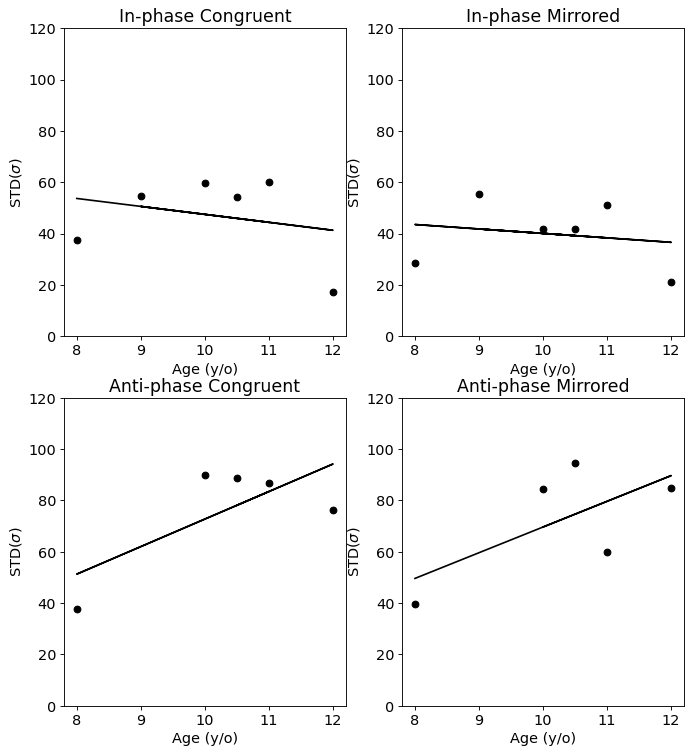

In [218]:
fig = plt.figure(figsize=(10, 11), dpi=80)
plt.rcParams.update({'font.size': 13})
plt_num = 1

for t in title:
    # plt.ylim(0, 180)
    df_temp = df_stat.loc[df_stat['type'] == t]
    plt.subplot(2, 2, plt_num)
    x,y = df_temp["age"].to_list(), df_temp["std"].to_list()
    coef = np.polyfit(x,y,1)
    poly1d_fn = np.poly1d(coef) 
    plt.plot(x,y, 'yo', x, poly1d_fn(x), '-', color='black')
    plt.title(title[plt_num-1])
    plt.xlabel("Age (y/o)")
    plt.ylabel(r'STD($\sigma$)')
    plt.ylim(0, 120)
    # plt.scatter(df_temp["age"], df_temp["std"])
    plt_num+=1
plt.show



<Axes: xlabel='age', ylabel='std'>

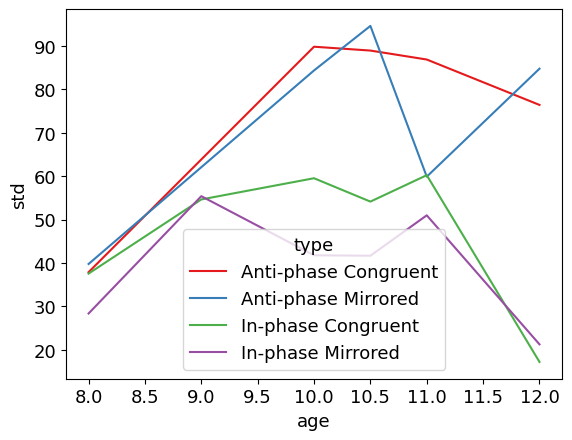

In [224]:
import seaborn as sns
# pd_df = pd.DataFrame(your_list, columns=['x_data', 'y_data', 'group_categories'])
sns.lineplot(data=df_stat, 
             x='age', y='std', hue='type', errorbar=('ci', 95),
             legend="full", palette="Set1")
